## Bifurcation diagram slow system $M_0^+$

Import packages:

In [1]:
import numpy as np
from numpy.polynomial import Polynomial as pol
from matplotlib import pyplot as plt
import matplotlib as mpl
import copy
import itertools
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines
from matplotlib import animation
from scipy.optimize import minimize

Import own modules:

In [2]:
import import_ipynb
from COSMETICS import *
from SETUP import f0, IinTprep, IinT, TSslow, f, J

importing Jupyter notebook from COSMETICS.ipynb
importing Jupyter notebook from SETUP.ipynb


## Fig 2.1

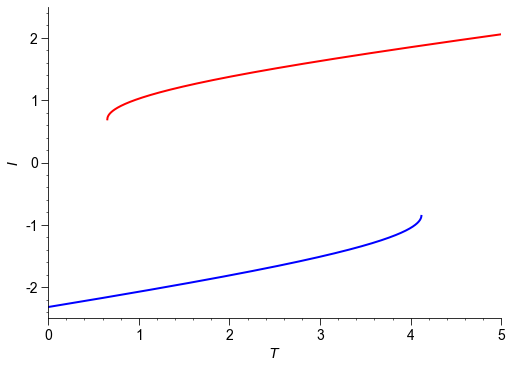

In [3]:
mpl.rcParams['axes.spines.top'] = False

R = -0.2
c = 0.1
dx = 0.001

T_u, T_l, I_u, I_l = IinTprep(R, dx, c, Tmax=10)

fig = plt.figure(figsize=(7,5))
plt.plot(T_u, I_u, color='r', label='$I_+(T)$', lw=2)
plt.plot(T_l, I_l, color='b', label = '$I_-(T)$', lw=2)
plt.xlabel('$T$')
plt.ylabel('$I$')
plt.xlim(0,5)
plt.ylim(-2.5, 2.5)
plt.show()

## Fig 2.3

In [4]:
e2=1.0
e3=0.3
e1range = np.arange(2, 4, 0.01) # range of values of eta_1

# Here, we initialise lists for each different type of equilibrium 
# that could occur. 'S' = saddle, 'sN' = stable node, and 'sF' = stable focus.
e1list_S = []
Psilist_S = []
Slist_S = []
Tlist_S = []

e1list_sN = []
Psilist_sN = []
Slist_sN = []
Tlist_sN = []

e1list_sF = []
Psilist_sF = []
Slist_sF = []
Tlist_sF = []

# for each value of eta_1, find all equilibrium values of the Stommel model,
# determine the associated equilibrium type using the eigenvalues, and append
# the equilibrium to right type list
for x in e1range:
    for v in f(x, e2, e3):
        (l1, l2) = J(*v, e3)
        if abs(l1.imag) < 1e-5:
            if l1*l2 < 0: # saddle
                e1list_S.append(x)
                Psilist_S.append(v[1]-v[0])
                Slist_S.append(v[0])
                Tlist_S.append(v[1])
            else:
                if (l1>0 and l2>0): # unstable node
                    print('Unstable node')
                else: # stable node
                    e1list_sN.append(x) 
                    Psilist_sN.append(v[1]-v[0])
                    Slist_sN.append(v[0])
                    Tlist_sN.append(v[1])
        else:
            if l1.real > 0: # unstable focus
                print('Unstable focus')
            else:
                e1list_sF.append(x) # stable focus
                Psilist_sF.append(v[1]-v[0])
                Slist_sF.append(v[0])
                Tlist_sF.append(v[1])

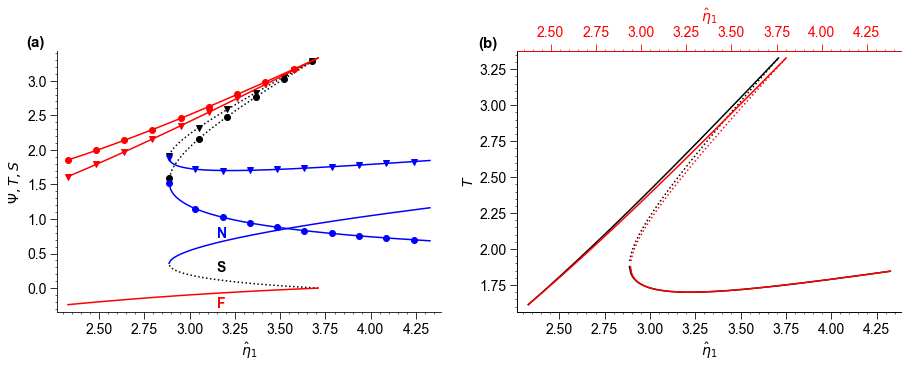

In [5]:
mpl.rcParams['axes.spines.top'] = False
plt.rcParams['figure.constrained_layout.use'] = False

R = 0.2
dx = 0.01
I_term = 1
k = 0.151

fig = plt.figure(figsize=(13, 5.5))

c = 0.1
    
plt.subplot(1,2,1)
plt.xlabel('$\hat{\eta}_1$')
plt.ylabel('$\Psi, T, S$')

T_u, T_l, I_u, I_l = IinTprep(R, dx, c, Imax=5)

e1hat_sN = [e1list_sN[i]+k*IinT(Tlist_sN[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_sN))]
e1hat_sF = [e1list_sF[i]+k*IinT(Tlist_sF[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_sF))]
e1hat_S = [e1list_S[i]+k*IinT(Tlist_S[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_S))]

plt.plot(e1hat_S, Psilist_S, linestyle=':', color='k')
plt.plot(e1hat_S, Slist_S, linestyle=':', color='k', marker='o', markevery=15, ms='6')
plt.plot(e1hat_S, Tlist_S, linestyle=':', color='k', marker='v', markevery=15, ms='6')

plt.plot(e1hat_sN, Psilist_sN, color='b')
plt.plot(e1hat_sN, Slist_sN, color='b', marker='o', markevery=15, ms='6')
plt.plot(e1hat_sN, Tlist_sN, color='b', marker='v', markevery=15, ms='6')

plt.plot(e1hat_sF, Psilist_sF, color='r')
plt.plot(e1hat_sF, Slist_sF, color='r', marker='o', markevery=15, ms='6')
plt.plot(e1hat_sF, Tlist_sF, color='r', marker='v', markevery=15, ms='6')

plt.text(3.15, 0.24, 'S', color = 'k', weight = 'bold')
plt.text(3.15, 0.725, 'N', color = 'b', weight = 'bold')
plt.text(3.15, -0.28, 'F', color = 'r', weight = 'bold')
Psilabel = mlines.Line2D([], [], color='black', markersize=8, label='$\Psi$')
Slabel = mlines.Line2D([], [], color='black', marker='o', markersize=8, label='$S$')
Tlabel = mlines.Line2D([], [], color='black', marker='v', markersize=8, label='$T$')
# plt.legend(handles=[Psilabel, Tlabel, Slabel])
plt.text(2.1, 3.5, '(a)', weight='bold', fontsize=15)


mpl.rcParams['axes.spines.top'] = True
plt.subplot(1,2,2)
plt.xlabel('$\hat{\eta}_1$')
plt.ylabel('$\Psi, T, S$')

ax1 = plt.gca()

## First axis
c = 0.1
R = 0.2
dx = 0.01
I_term = 1
k = 0.151
T_u, T_l, I_u, I_l = IinTprep(R, dx, c)
e1hat_sN = [e1list_sN[i]+k*IinT(Tlist_sN[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_sN))]
e1hat_sF = [e1list_sF[i]+k*IinT(Tlist_sF[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_sF))]
e1hat_S = [e1list_S[i]+k*IinT(Tlist_S[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_S))]

ax1.plot(e1hat_S, Tlist_S, linestyle=':', color='k', markevery=15, ms='6')
ax1.plot(e1hat_sN, Tlist_sN, color='k', markevery=15, ms='6') #b
ax1.plot(e1hat_sF, Tlist_sF, color='k', markevery=15, ms='6') #r

plt.xlabel('$\hat{\eta}_1$')
plt.ylabel('$T$')

## Second axis
c = 0.2
R = 0.2
dx = 0.01
I_term = 1
k = 0.151
T_u, T_l, I_u, I_l = IinTprep(R, dx, c, Imax=10)
e1hat_sN = [e1list_sN[i]+k*IinT(Tlist_sN[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_sN))]
e1hat_sF = [e1list_sF[i]+k*IinT(Tlist_sF[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_sF))]
e1hat_S = [e1list_S[i]+k*IinT(Tlist_S[i], I_term, R, dx, c, T_u, T_l, I_u, I_l) for i in range(len(e1list_S))]


ax2 = ax1.twiny()
ax2.tick_params(labelcolor='red', color='red', which='both')
ax2.spines['top'].set_color('red')

ax2.plot(e1hat_S, Tlist_S, linestyle=':', color='r', markevery=15, ms='6') #k
ax2.plot(e1hat_sN, Tlist_sN, color='r', markevery=15, ms='6') #b
ax2.plot(e1hat_sF, Tlist_sF, color='r', markevery=15, ms='6')
# plt.axvline(x = 3, color = 'red', alpha=0.3, ls='--')
plt.xlabel('$\hat{\eta}_1$',color='red')
plt.text(2.1, 3.4, '(b)', weight='bold', fontsize=15)


plt.tight_layout(pad=1.5)
plt.show()